### Importando bibliotecas



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

C:\Users\victo\AppData\Local\Temp\ipykernel_9184\3381811058.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Lendo dataset

In [3]:
DiabetesDF = pd.read_csv('diabetes_dataset.csv')

In [4]:
DiabetesDF.head()

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0


In [5]:
#Informações do dataset
DiabetesDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   year                  100000 non-null  int64  
 1   gender                100000 non-null  object 
 2   age                   100000 non-null  float64
 3   location              100000 non-null  object 
 4   race:AfricanAmerican  100000 non-null  int64  
 5   race:Asian            100000 non-null  int64  
 6   race:Caucasian        100000 non-null  int64  
 7   race:Hispanic         100000 non-null  int64  
 8   race:Other            100000 non-null  int64  
 9   hypertension          100000 non-null  int64  
 10  heart_disease         100000 non-null  int64  
 11  smoking_history       100000 non-null  object 
 12  bmi                   100000 non-null  float64
 13  hbA1c_level           100000 non-null  float64
 14  blood_glucose_level   100000 non-null  int64  
 15  d

In [7]:
#Analisando valores nulos
DiabetesDF.isnull().sum()

year                    0
gender                  0
age                     0
location                0
race:AfricanAmerican    0
race:Asian              0
race:Caucasian          0
race:Hispanic           0
race:Other              0
hypertension            0
heart_disease           0
smoking_history         0
bmi                     0
hbA1c_level             0
blood_glucose_level     0
diabetes                0
dtype: int64

In [8]:
#Analisando os tipos e quantidades de valores das colunas
DiabetesDF.nunique().sort_values()

race:AfricanAmerican       2
race:Asian                 2
race:Caucasian             2
race:Hispanic              2
race:Other                 2
hypertension               2
heart_disease              2
diabetes                   2
gender                     3
smoking_history            6
year                       7
hbA1c_level               18
blood_glucose_level       18
location                  55
age                      102
bmi                     4247
dtype: int64

Dropando colunas indesejadas


In [15]:
DiabetesDF = DiabetesDF.drop(columns='year')
DiabetesDF = DiabetesDF.drop(columns='location')

In [17]:
#Conferindo DF
DiabetesDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   gender                100000 non-null  object 
 1   age                   100000 non-null  float64
 2   race:AfricanAmerican  100000 non-null  int64  
 3   race:Asian            100000 non-null  int64  
 4   race:Caucasian        100000 non-null  int64  
 5   race:Hispanic         100000 non-null  int64  
 6   race:Other            100000 non-null  int64  
 7   hypertension          100000 non-null  int64  
 8   heart_disease         100000 non-null  int64  
 9   smoking_history       100000 non-null  object 
 10  bmi                   100000 non-null  float64
 11  hbA1c_level           100000 non-null  float64
 12  blood_glucose_level   100000 non-null  int64  
 13  diabetes              100000 non-null  int64  
dtypes: float64(3), int64(9), object(2)
memory usage: 10.7

Dividindo df em tipos categoricos e numericos

In [18]:
colunas_numericas = DiabetesDF.select_dtypes(include='number').columns
colunas_categoricas = DiabetesDF.select_dtypes(exclude='number').columns


In [19]:
colunas_numericas

Index(['age', 'race:AfricanAmerican', 'race:Asian', 'race:Caucasian',
       'race:Hispanic', 'race:Other', 'hypertension', 'heart_disease', 'bmi',
       'hbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [20]:
colunas_categoricas

Index(['gender', 'smoking_history'], dtype='object')

Transformando colunas categoricas em True ou False

In [21]:
df_dummies = pd.get_dummies(DiabetesDF, colunas_categoricas,drop_first= True)
DiabetesDF.head()

,gender,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,Female,32.0,0,0,0,0,1,0,0,never,27.32,5.0,100,0
1,Female,29.0,0,1,0,0,0,0,0,never,19.95,5.0,90,0
2,Male,18.0,0,0,0,0,1,0,0,never,23.76,4.8,160,0
3,Male,41.0,0,0,1,0,0,0,0,never,27.32,4.0,159,0
4,Female,52.0,1,0,0,0,0,0,0,never,23.75,6.5,90,0


In [23]:
df_dummies.head()

,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,diabetes,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,32.0,0,0,0,0,1,0,0,27.32,5.0,100,0,False,False,False,False,False,True,False
1,29.0,0,1,0,0,0,0,0,19.95,5.0,90,0,False,False,False,False,False,True,False
2,18.0,0,0,0,0,1,0,0,23.76,4.8,160,0,True,False,False,False,False,True,False
3,41.0,0,0,1,0,0,0,0,27.32,4.0,159,0,True,False,False,False,False,True,False
4,52.0,1,0,0,0,0,0,0,23.75,6.5,90,0,False,False,False,False,False,True,False


Dividindo DF em target e features

In [24]:
# Features
X = df_dummies.drop('diabetes',axis=1)

# Target(alvo)

y = df_dummies['diabetes']

Dividindo em treino e teste

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [27]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((80000, 18), (80000,), (20000, 18), (20000,))

Importando modelo de ML

In [29]:
import xgboost as xgb

In [30]:
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [31]:
y_pred = xgb_classifier.predict(X_test)

Definindo metrica de precisao

In [32]:
from sklearn.metrics import accuracy_score

acuracia = accuracy_score(y_test, y_pred)
print(acuracia)

0.97145


Entendendo resultado com matriz de confusão

In [34]:
from sklearn.metrics import confusion_matrix


Matriz de Confusão:
[[18241    56]
 [  515  1188]]


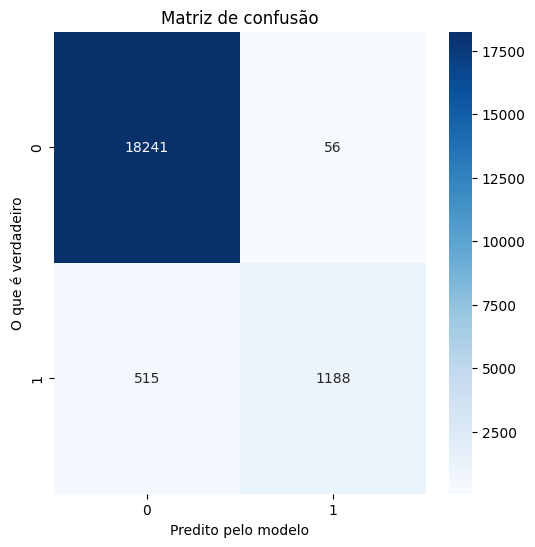

In [38]:
#Gerar matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusão:')
print(conf_matrix)
# Gerar grafico da matriz
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, fmt="d",cmap='Blues', xticklabels=DiabetesDF['diabetes'].unique(), yticklabels=DiabetesDF['diabetes'].unique())
plt.xlabel("Predito pelo modelo")
plt.ylabel("O que é verdadeiro")
plt.title("Matriz de confusão")
plt.show()


Observando relevância das features para o modelo

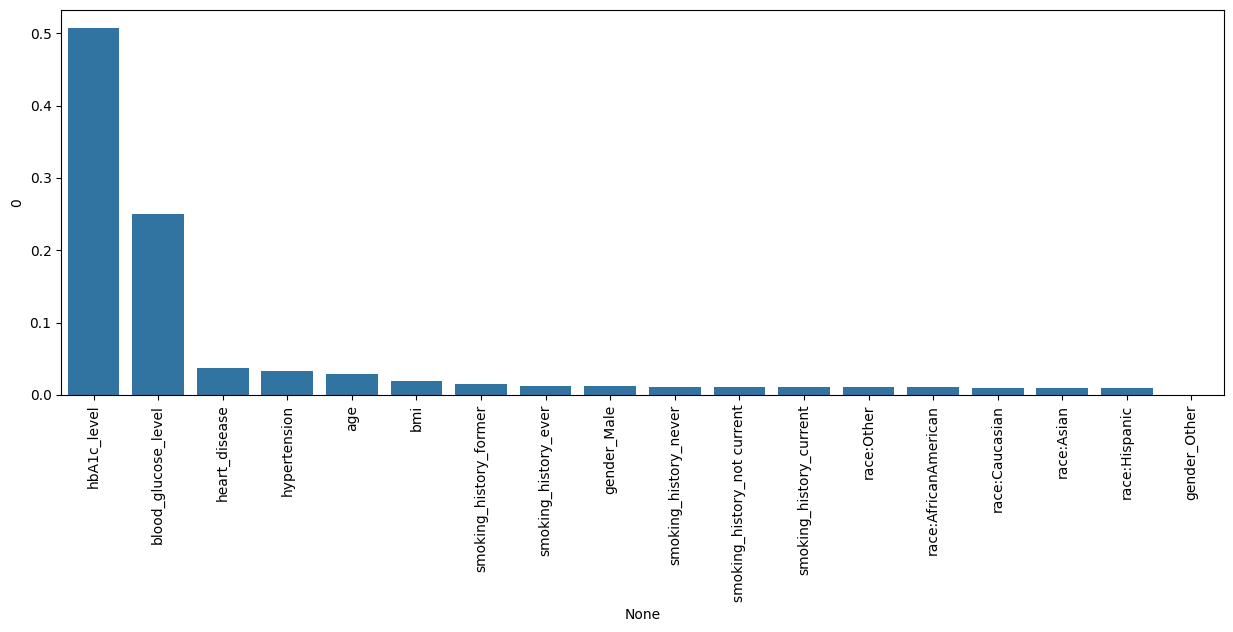

In [40]:
importancia_features = pd.DataFrame(xgb_classifier.feature_importances_, X_train.columns)
importancia_features = importancia_features.sort_values (by=0, ascending=False)
plt.figure(figsize= (15, 5)) 
ax = sns.barplot(x=importancia_features.index, y=importancia_features [0]) 
ax.tick_params(axis='x', rotation=90)

# Considerações finais:

Concluindo sobre o output, basicamente, 515 pacientes foram preditos inadequadamente com diabetes, 1188 foram preditos adequadamente com diabetes, 18241 forom preditas adequadamente livres da doença e 56 pessoas foram preditos inadequadamente livres da doença, que é o cenário mais grave. A soma de todos esses fatores resultou na acurácia de cerca de 97% do nosso modelo, sendo considerado, na maioria dos casos, um modelo eficiente. Porém, por se tratar de um modelo de uso medicinal, seu resultado ainda é insatisfatório, pois, nesses casos, o número de falhas deve estar próximo, ao máximo possível do valor zero. Como este projeto é de uso acadêmico, o resultado do modelo é mais que satisfatório. Além disso, foi identificado que as features de nível de HbA1c e nível de glicose no sangue foram as mais influentes na construção do modelo. 